Intercept (b0): -0.5138888888888902
Coefficients:
Distance_km: 0.5305555555555546
Items: -0.23611111111110988
Traffic_Level: 0.7444444444444468
Processing_Time_hr: 0.5444444444444445
MAE: 0.13240740740740783
MSE: 0.023356481481481495
RMSE: 0.15282827448309916
R2 Score: 0.9778728070175439
Predicted Delivery Time: 13.019444444444435


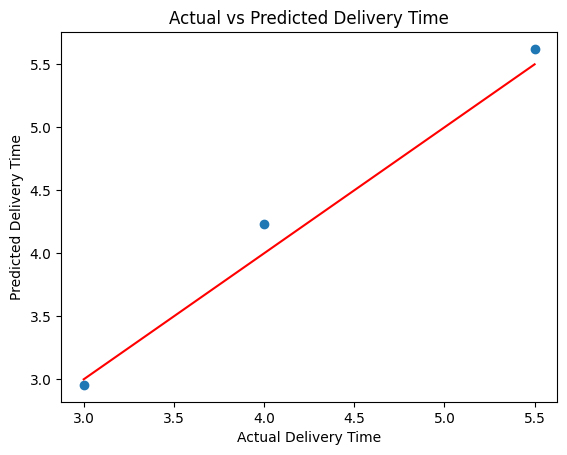

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv("/content/Delievery_dataset - Sheet1 (1).csv")
X = df[['Distance_km', 'Items', 'Traffic_Level', 'Processing_Time_hr']]
y = df['Delivery_Time_hr']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept (b0):", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

new_order = pd.DataFrame(
    [[20, 4, 3, 3]],
    columns=['Distance_km', 'Items', 'Traffic_Level', 'Processing_Time_hr']
)

prediction = model.predict(new_order)
print("Predicted Delivery Time:", prediction[0])

plt.scatter(y_test, y_pred)

# Add ideal line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red')

plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.show()


